Pymaceuticals

Analysis:

The two most common drug regimens used on the mice were Capomulin and Ramicane.

The number of female and male mice observed in the trials were nearly the same.

The boxplots show that the mice on Capomulin and Ramicane had smaller final tumor volumes as compared to the mice on Infubinol or Ceftamin

Looking at one specific mouse on Capomulin, the data showed that the tumor volume decreased over time after the Capomulin treatment

Finally, the data showed that the average tumor volume is directly correlated to the weight of the mice. The heavier the mouse, the larger the tumor volume of the mouse.

In [248]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [249]:
# Checking the number of mice.
mice_count = len(study_data_complete["Mouse ID"].unique())
mice_count

249

In [250]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number
duplicates = study_data_complete[study_data_complete.duplicated(["Mouse ID", "Timepoint"], keep=False)]

#find the specific ID number for the duplicated data
duplicate_mice_ID = duplicates.iloc[0,0]
duplicate_mice_ID


'g989'

In [251]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_complete[study_data_complete.duplicated(["Mouse ID", "Timepoint"], keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [252]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. I did this by keeping all rows that do not contain the duplicate mice ID
clean_data_complete = study_data_complete[study_data_complete['Mouse ID'] != duplicate_mice_ID]

clean_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [253]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(clean_data_complete["Mouse ID"].unique())
mice_count_clean

248

Summary Statistics

In [254]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

per_drug_mean = clean_data_complete.groupby(["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
per_drug_median = clean_data_complete.groupby(["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"]
per_drug_variance = clean_data_complete.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
per_drug_std = clean_data_complete.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
per_drug_sem = clean_data_complete.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

per_drug_summary = pd.DataFrame({
    "Mean Tumor Volume": per_drug_mean,
    "Median Tumor Volume": per_drug_median,
    "Tumor Volume Variance": per_drug_variance,
    "Tumor Volume Std. Dev.": per_drug_std,
    "Tumor Volume Std. Err.": per_drug_sem
})
per_drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


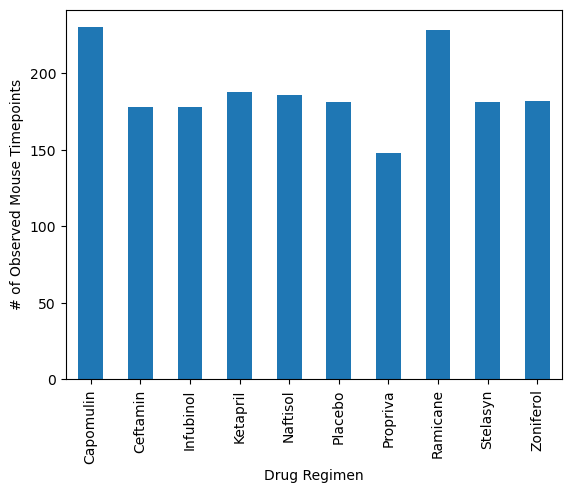

In [255]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# group by drug name
drug_type = clean_data_complete.groupby("Drug Regimen")

#count how many observed timepoints per drug
count_drug_type = drug_type["Drug Regimen"].count()

#plot
drug_bar = count_drug_type.plot(kind='bar')
drug_bar.set_xlabel("Drug Regimen")
drug_bar.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

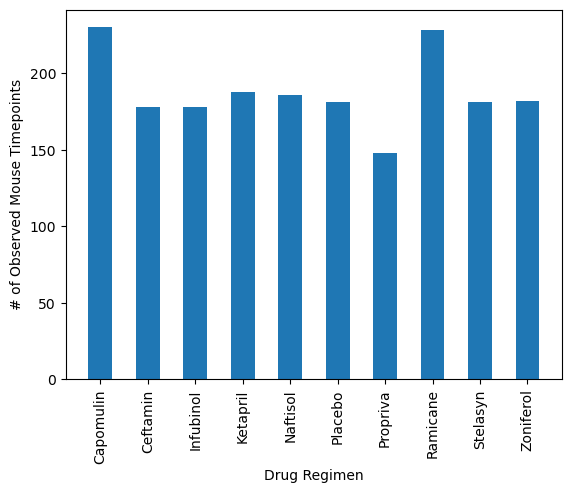

In [256]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# group by drug name
drug_type = clean_data_complete.groupby("Drug Regimen")

#count how many observed timepoints per drug
count_drug_type = drug_type["Drug Regimen"].count()

#convert series to dataframe 
plot_df = count_drug_type.to_frame()

# use index values as the x-axis
drug_list = list(plot_df.index.values)

# use dataframe to extract mouse timepoints
counts_mices = plot_df.iloc[:,0]

#plot
plt.bar(drug_list,counts_mices, width = 0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.show()

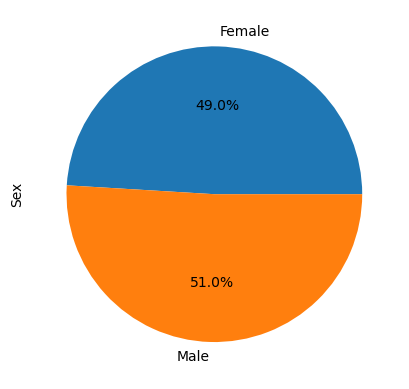

In [257]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# group by sex type
sex_type = clean_data_complete.groupby("Sex")

#count how many observed mice timepoints per sex
count_sex_type = sex_type["Sex"].count()

# plot
sex_pie = count_sex_type.plot(kind='pie', autopct='%1.1f%%')
sex_pie.set_ylabel("Sex")
plt.show()

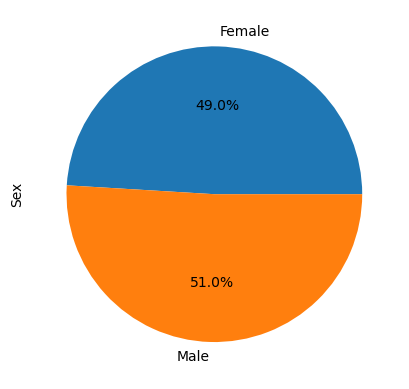

In [258]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# group by sex type
sex_type = clean_data_complete.groupby("Sex")

#count how many observed mice timepoints per sex
count_sex_type = sex_type["Sex"].count()

#convert series to dataframe 
pyplot_df = count_sex_type.to_frame()

# use index values as the labels
sex_list = list(pyplot_df.index.values)
counts_sex = pyplot_df.iloc[:,0]

#plot
plt.pie(counts_sex, labels=sex_list, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

Quartiles, Outliers and Boxplots

In [259]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data_complete.loc[clean_data_complete.groupby('Mouse ID')['Timepoint'].idxmax()]

# Drop unnecessary columns. This dataframe contains the data for the max timepoint for each mouse ID and the corresponding Drug and Tumor Volume data.
greatest_timepoint = greatest_timepoint.drop(columns=['Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'])
greatest_timepoint.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
1804,a203,45,67.973419,Infubinol
1786,a251,45,65.525743,Infubinol
1783,a262,45,70.717621,Placebo
1856,a275,45,62.999356,Ceftamin
1401,a366,30,63.440686,Stelasyn


In [260]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capomulin_vol =[]
ramicane_vol =[]
infubinol_vol=[]
ceftamin_vol=[]

#loop through our dataframe and extract the tumor volumes and append them to the correct corresponding list
for ind in greatest_timepoint.index:
    if greatest_timepoint['Drug Regimen'][ind] == 'Capomulin':
        capomulin_vol.append(greatest_timepoint['Tumor Volume (mm3)'][ind])
    elif greatest_timepoint['Drug Regimen'][ind] == 'Ramicane':
        ramicane_vol.append(greatest_timepoint['Tumor Volume (mm3)'][ind])
    elif greatest_timepoint['Drug Regimen'][ind] == 'Infubinol':
        infubinol_vol.append(greatest_timepoint['Tumor Volume (mm3)'][ind])
    elif greatest_timepoint['Drug Regimen'][ind] == 'Ceftamin':
        ceftamin_vol.append(greatest_timepoint['Tumor Volume (mm3)'][ind])
        

In [261]:
# create a function that takes the tumor volume and treatment lists and outputs the IQR and whether or not the data has an outlier
def outlier(tumor, medicine):
    iqr = st.iqr(tumor)
    print("The IQR for " + str(medicine) + " is " + str(iqr))
    lower_bound = np.percentile(tumor, [25]) - 1.5*iqr
    upper_bound = np.percentile(tumor, [75]) + 1.5*iqr
    outlier = False
    for x in tumor:
        if x > upper_bound or x < lower_bound:
            print("The outlier for " + str(medicine) + " is " + str(x))
            outlier = True
    if outlier == False:
        print(str(medicine) + " does not have an outlier")

In [262]:
# run the outlier function
outlier(capomulin_vol, treatments[0])
outlier(ramicane_vol, treatments[1])
outlier(infubinol_vol, treatments[2])
outlier(ceftamin_vol, treatments[3])

The IQR for Capomulin is 7.781863460000004
Capomulin does not have an outlier
The IQR for Ramicane is 9.098536719999998
Ramicane does not have an outlier
The IQR for Infubinol is 11.477135160000003
The outlier for Infubinol is 36.3213458
The IQR for Ceftamin is 15.577752179999997
Ceftamin does not have an outlier


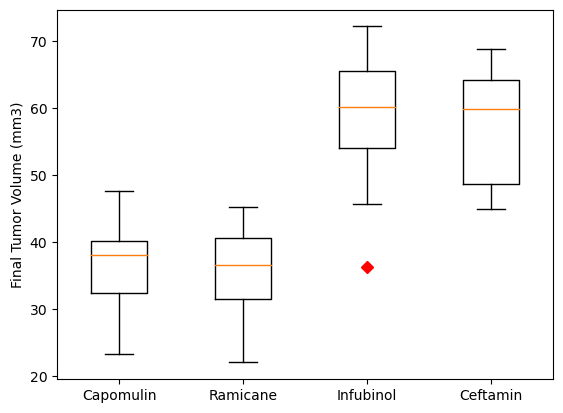

In [263]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# create dictionary with data
drug_dict = {treatments[0]:capomulin_vol, treatments[1]:ramicane_vol, treatments[2]: infubinol_vol, treatments[3]: ceftamin_vol}

# create a figure that displays a boxplot for each drug - label the outlier with a bright color
fig, ax = plt.subplots()
ax.boxplot(drug_dict.values(), 0, 'rD')
ax.set_xticklabels(drug_dict.keys())
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

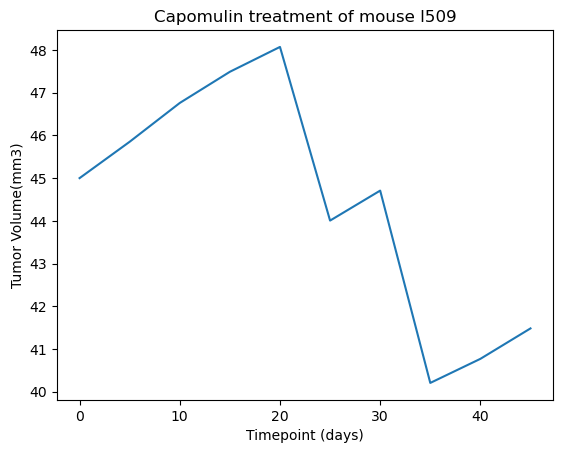

In [264]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# get data for single mouse
mouseID = 'l509'
single_mouse = clean_data_complete[clean_data_complete['Mouse ID'] == mouseID]

# extract the timepoint and volume data
x_values = single_mouse['Timepoint']
y_values = single_mouse['Tumor Volume (mm3)']

#plot
plt.plot(x_values, y_values)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

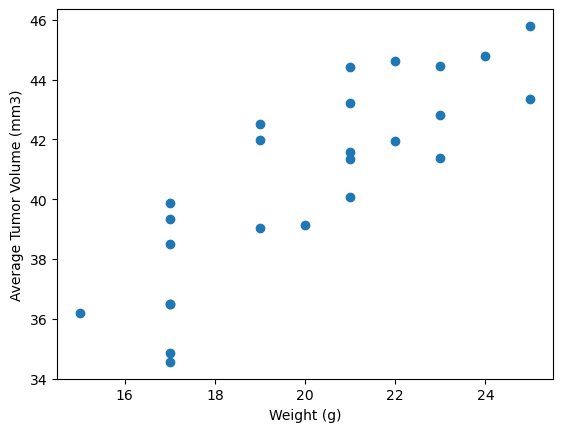

In [265]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
DrugID = 'Capomulin'
# include only data for the drug in question
single_drug = clean_data_complete[clean_data_complete['Drug Regimen'] == DrugID]
# group by Mouse ID and take the mean of each
mouse_group = single_drug.groupby(["Mouse ID"]).mean(numeric_only=True)

# select only volume and weight
avg_tumor = mouse_group["Tumor Volume (mm3)"]
avg_weight = mouse_group["Weight (g)"] 

#plot
plt.scatter(avg_weight, avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [266]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_weight, avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [269]:
# Perform a linear regression on year versus petrol-electric cars
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(avg_weight, avg_tumor)
# find range of where we can calculate the regression based on the max and min of the weight
min_x = avg_weight.min()
max_x = avg_weight.max()
regres_values = np.linspace(min_x,max_x,100)
# Create equation of line to calculate predicted tumor volume
pe_fit = pe_slope * regres_values + pe_int

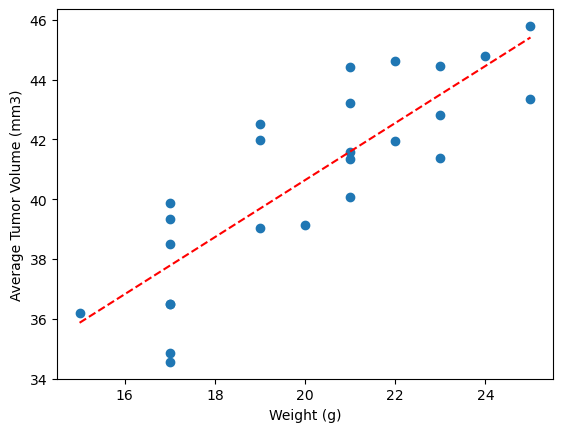

In [270]:
# plot results
plt.scatter(avg_weight, avg_tumor)
plt.plot(regres_values, pe_fit, "--", color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()